# Future Regressors
Future regressors can be added as both additive or multiplicative

In [32]:
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet

In [7]:
df = pd.read_csv('../example_data/example_wp_log_peyton_manning.csv')

# create two dummy regressors
df['A'] = df['y'].rolling(7, min_periods=1).mean()
df['B'] = df['y'].rolling(30, min_periods=1).mean()

In [8]:
# create future values of regressors
future_regressors_df = pd.DataFrame(data={'A': df['A'][:50], 'B': df['B'][:50]})

## Additive Future Regressors

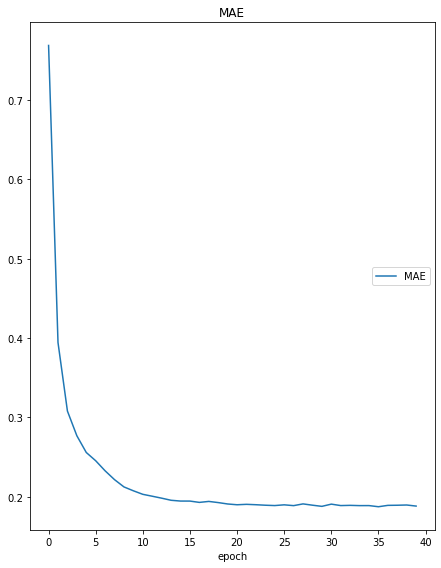

MAE
	MAE              	 (min:    0.188, max:    0.769, cur:    0.188)


In [9]:
m = NeuralProphet(
        n_forecasts=3,
        n_lags=5,
    )

# add future regressor configs to the NeuralProphet object (default mode is additive)
m = m.add_future_regressor(name='A')
m = m.add_future_regressor(name='B')

metrics = m.fit(df)


In [14]:
# create future dataframe with regressors
future = m.make_future_dataframe(df=df, regressors_df=future_regressors_df, n_historic_predictions=5, future_periods=3)
forecast = m.predict(df=future)

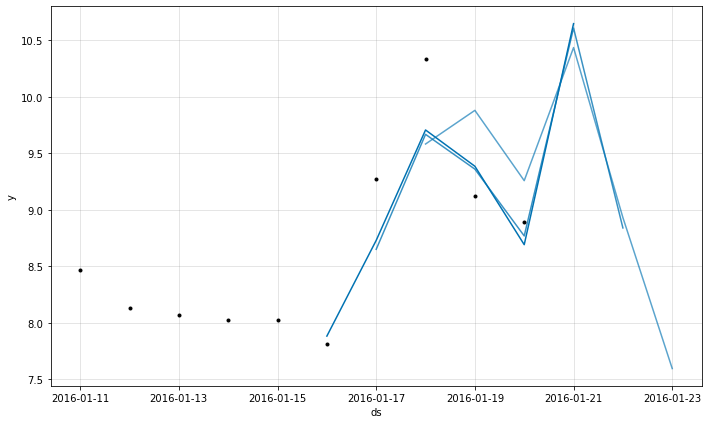

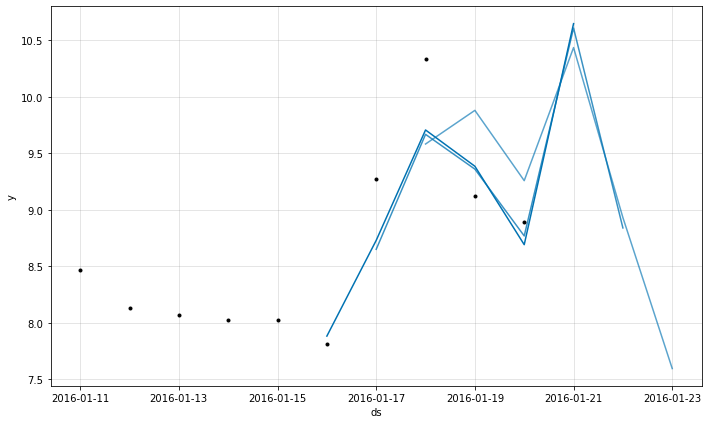

In [15]:
m.plot(forecast)

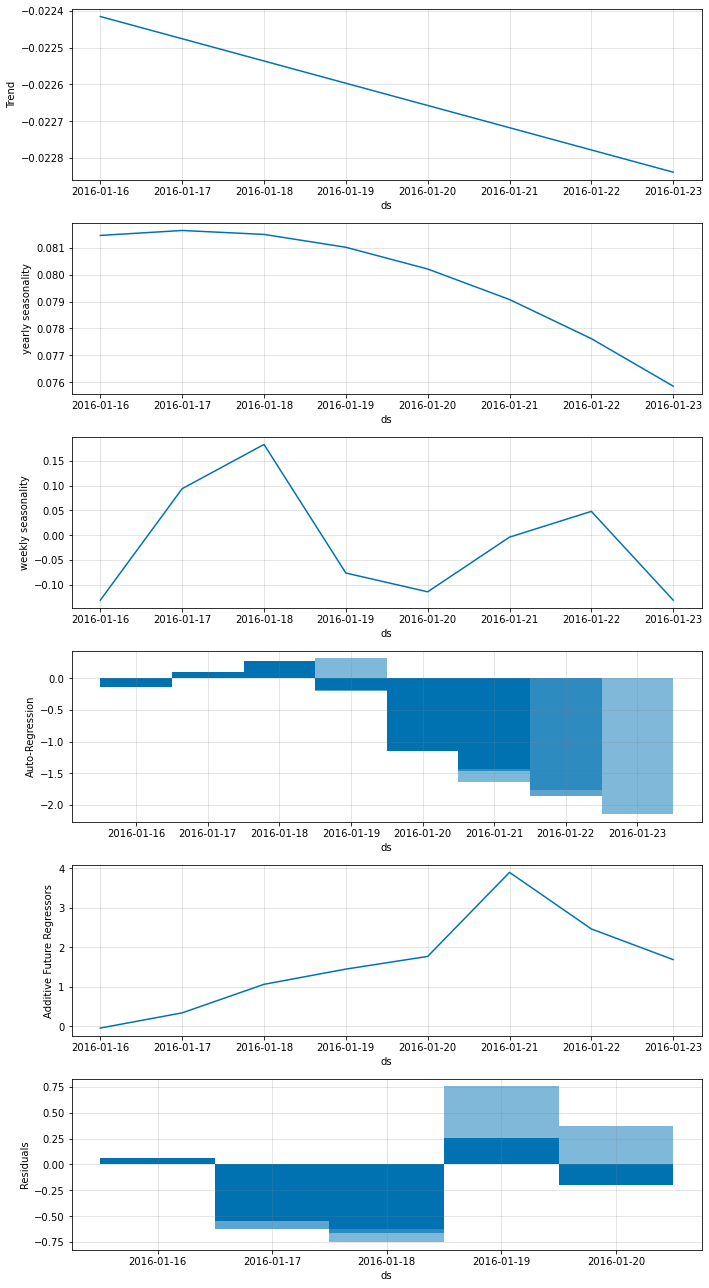

In [16]:
fig_comp = m.plot_components(forecast)

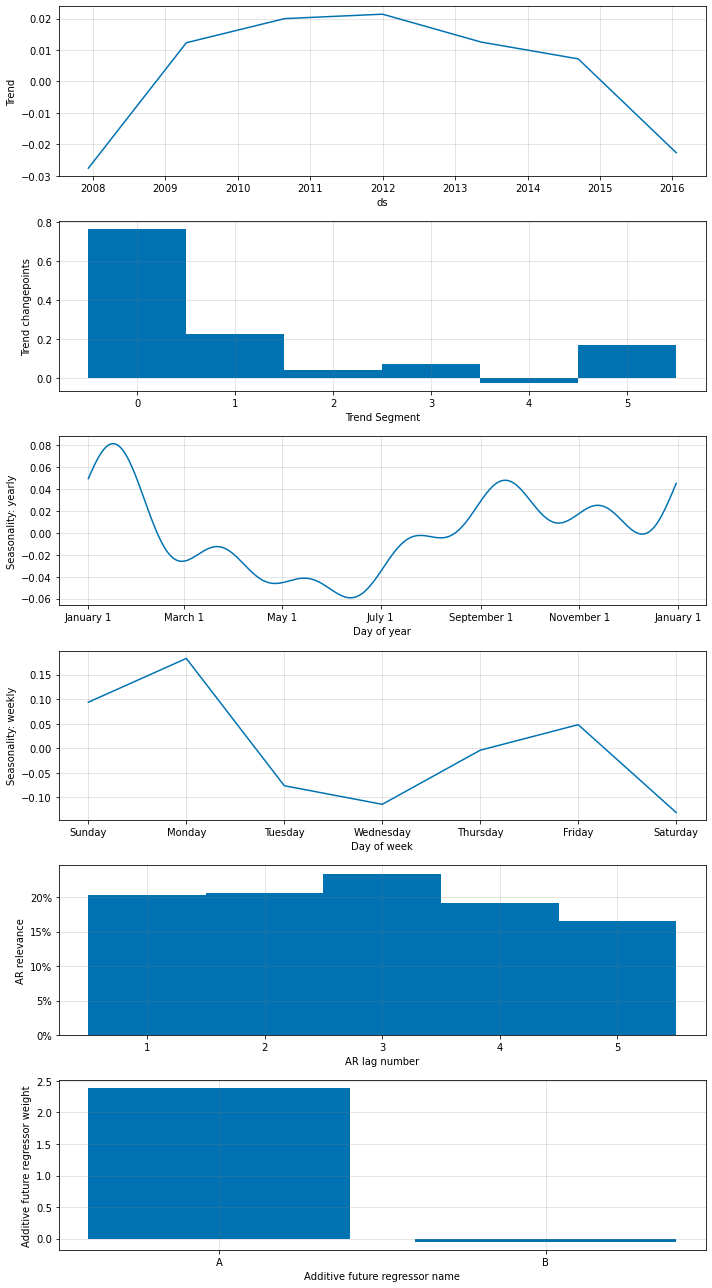

In [17]:
fig_param = m.plot_parameters()

## Multiplicative Future Regressors

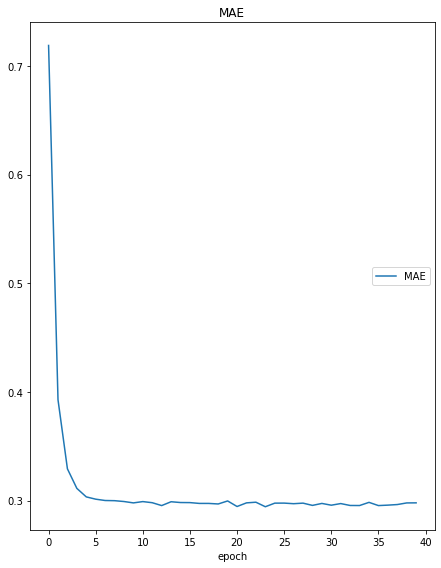

MAE
	MAE              	 (min:    0.294, max:    0.719, cur:    0.298)


In [18]:
m = NeuralProphet(
        n_forecasts=3,
        n_lags=5,
    )

# add future regressor configs to the NeuralProphet object 
m = m.add_future_regressor(name='A', mode="multiplicative")
m = m.add_future_regressor(name='B')

metrics = m.fit(df)

In [19]:
# create future dataframe with regressors
future = m.make_future_dataframe(df=df, regressors_df=future_regressors_df, n_historic_predictions=5, future_periods=3)
forecast = m.predict(df=future)

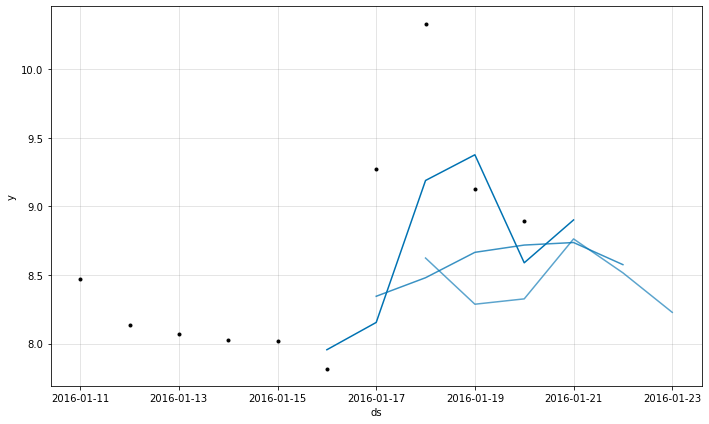

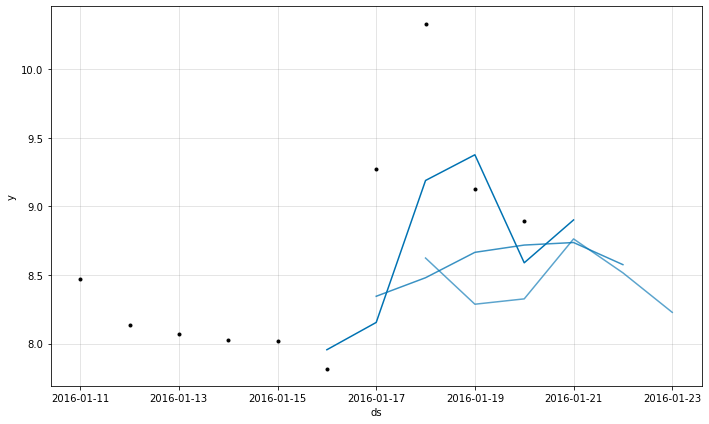

In [20]:
m.plot(forecast)

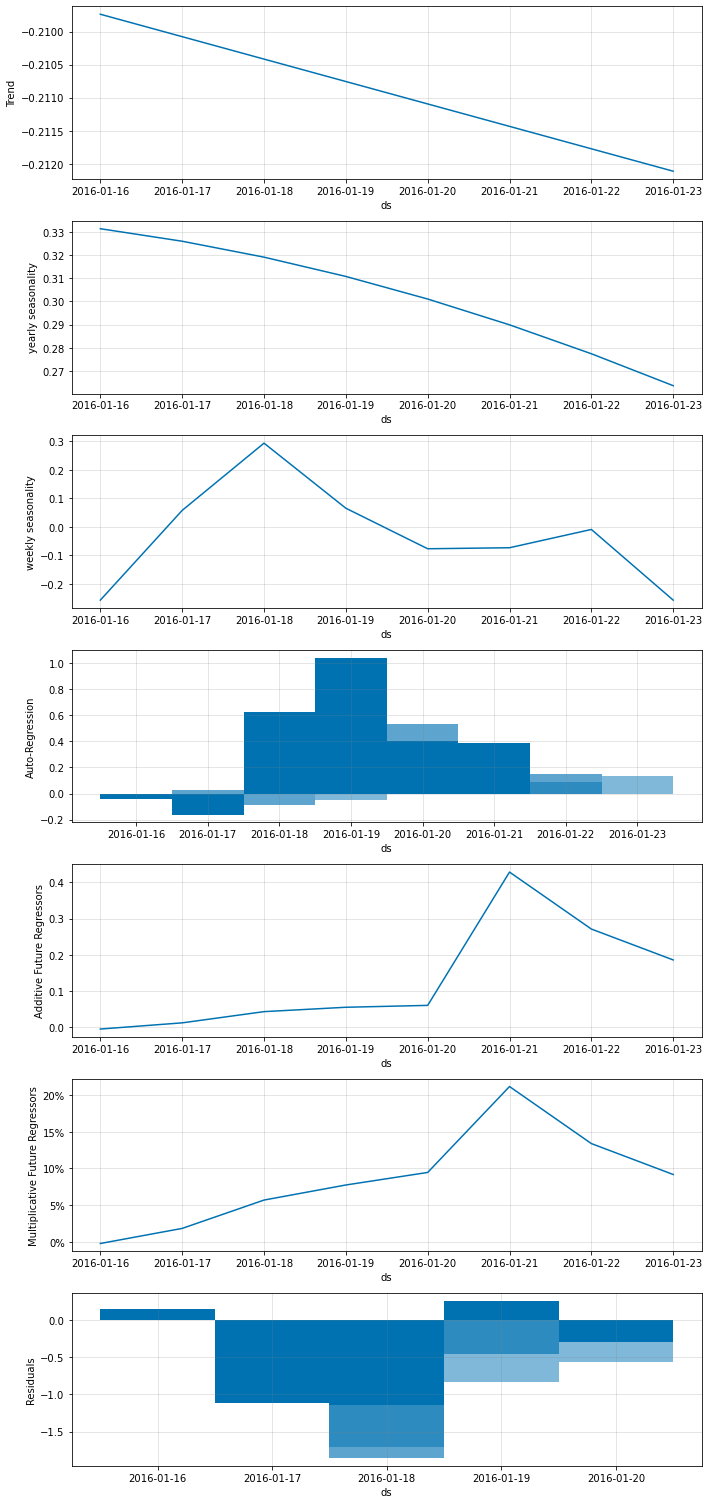

In [21]:
fig_comp = m.plot_components(forecast)

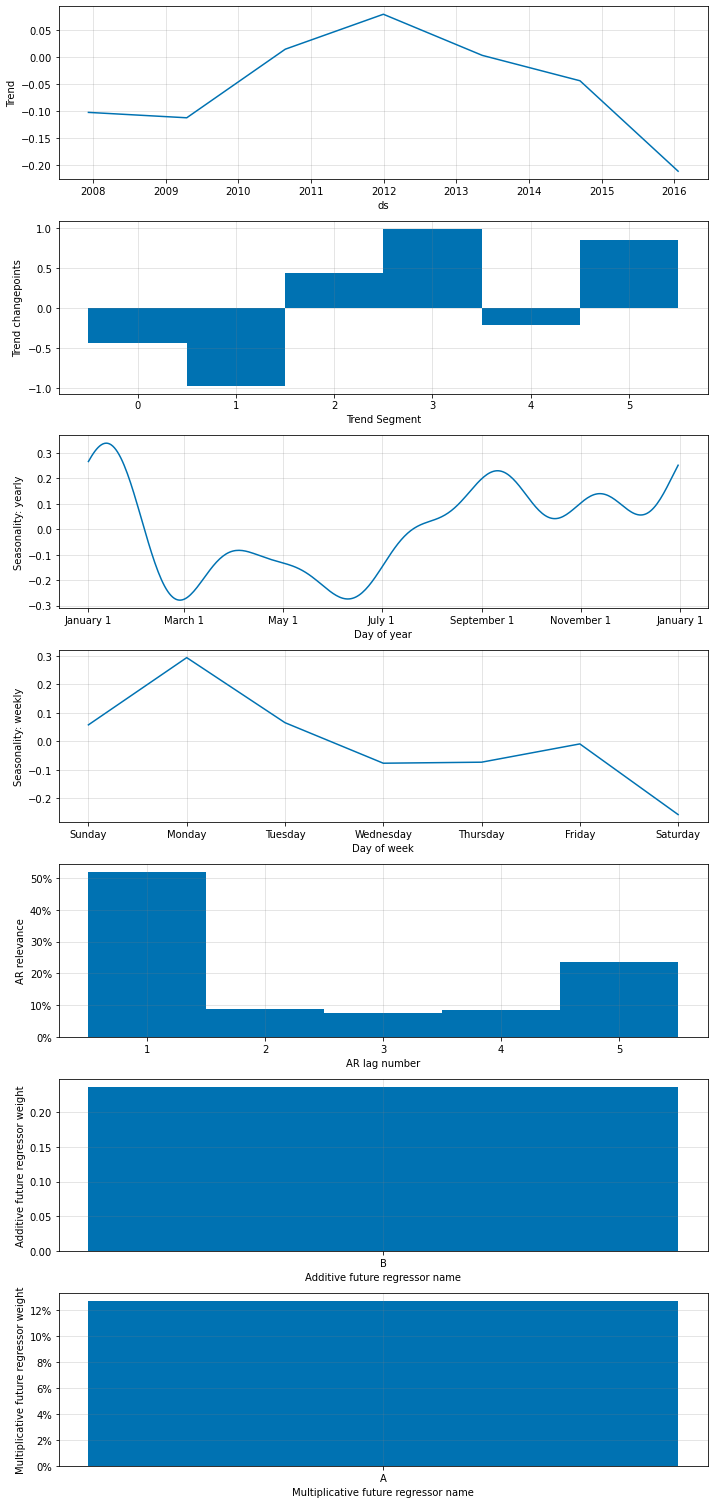

In [22]:
fig_param = m.plot_parameters()

## Regularization for Future Regressors

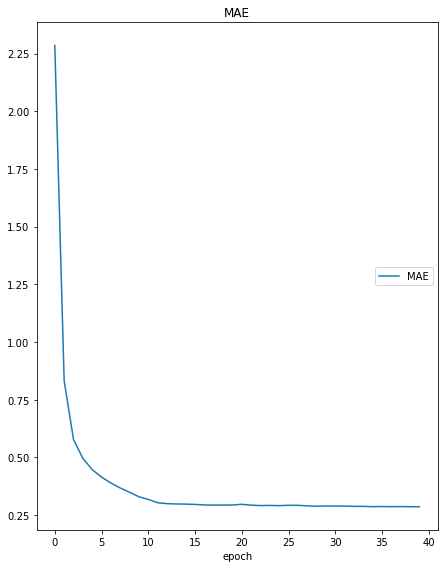

MAE
	MAE              	 (min:    0.286, max:    2.285, cur:    0.286)


,SmoothL1Loss,MAE,RegLoss
0,2.237871,2.285297,0.111964
1,0.602070,0.832073,0.081327
2,0.349048,0.577586,0.073504
3,0.274984,0.496254,0.065414
4,0.233121,0.446879,0.057248
5,0.205912,0.414984,0.048085
6,0.185054,0.388864,0.039311
7,0.168579,0.367478,0.030261
8,0.154080,0.348807,0.021165
9,0.140969,0.329591,0.012226


In [28]:
m = NeuralProphet(
        n_forecasts=3,
        n_lags=5,
    )

# add future regressor configs to the NeuralProphet object
# different regularizations for different regressors
m = m.add_future_regressor(name='A', regularization=0.05)
m = m.add_future_regressor(name='B', regularization=0.02)

metrics = m.fit(df)
metrics

In [29]:
# create future dataframe with regressors
future = m.make_future_dataframe(df=df, regressors_df=future_regressors_df, n_historic_predictions=5, future_periods=3)
forecast = m.predict(df=future)

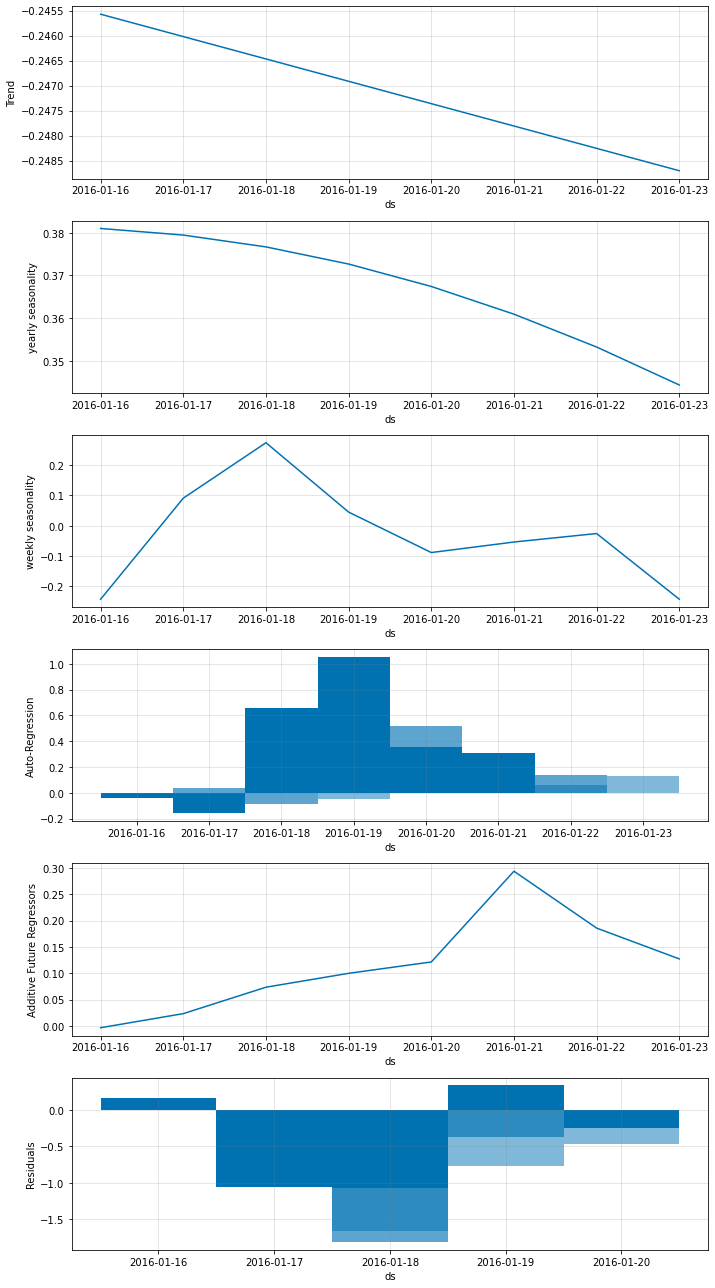

In [30]:
fig_comp = m.plot_components(forecast)

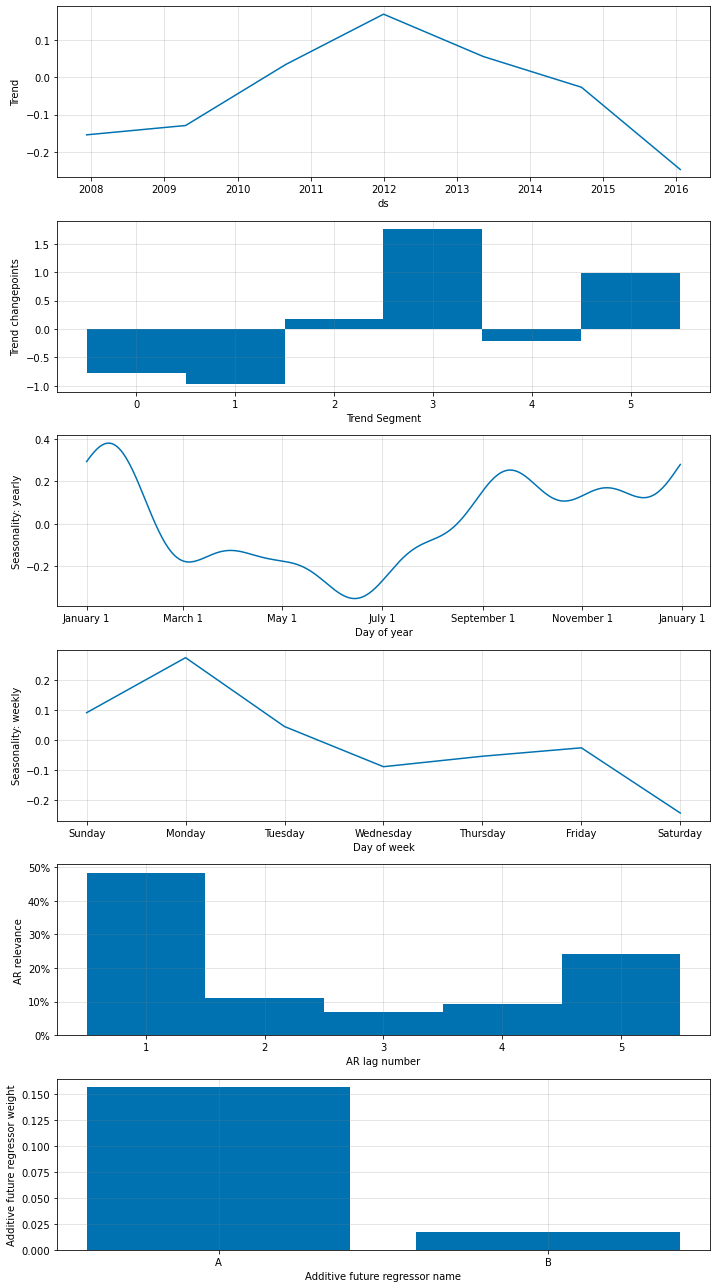

In [31]:
fig_param = m.plot_parameters()